# Hypothesis 2: Opinion Shift by Voting Experience

**Hypothesis:** First-time voters will experience greater opinion shifts after exposure to LLM-generated content compared to experienced voters.

This notebook's goal is to analyize the data in regards to the second hypothesis by comparing the opinion shifts per topic between the different voting experience groups. 

### Load preprocessed data

To start, we'll import all relevant libraries needed to test this hypothesis and load the data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

from data_preprocessing import load_and_preprocess

# Load and preprocess data
df = load_and_preprocess('data/cleaned_file.csv')

### Define thematic groups to measure opinion shifts

In [3]:
# Define item groups
climate_pre_items = ['BP03_03', 'BP03_05', 'BP03_06', 'BP03_08', 'BP03_09', 'BP03_10', 'BP03_14']
climate_post_items = ['FS09_03', 'FS09_05', 'FS09_06', 'FS09_08', 'FS09_09', 'FS09_10', 'FS09_14']
education_pre_items = ['BP03_04', 'BP03_07', 'BP03_11', 'BP03_12', 'BP03_13']
education_post_items = ['FS09_04', 'FS09_07', 'FS09_11', 'FS09_12', 'FS09_13']

In [4]:
# Calculate composite pre/post scores
df['climate_pre'] = df[climate_pre_items].mean(axis=1)
df['climate_post'] = df[climate_post_items].mean(axis=1)
df['education_pre'] = df[education_pre_items].mean(axis=1)
df['education_post'] = df[education_post_items].mean(axis=1)

In [5]:
# Calculate opinion shifts
df['climate_shift'] = df['climate_post'] - df['climate_pre']
df['education_shift'] = df['education_post'] - df['education_pre']

### One-way ANOVA using the f_oneway function:

In [6]:
# Define groups
groups = df['voting_experience'].unique()

# Climate shift per groups
climate_groups = [df[df['voting_experience'] == g]['climate_shift'] for g in groups]
education_groups = [df[df['voting_experience'] == g]['education_shift'] for g in groups]

# One-way ANOVA
climate_anova = f_oneway(*climate_groups)
education_anova = f_oneway(*education_groups)

print("Climate Shift - ANOVA by Voting Experience:", climate_anova)
print("Education Shift - ANOVA by Voting Experience:", education_anova)

Climate Shift - ANOVA by Voting Experience: F_onewayResult(statistic=0.2601544030239485, pvalue=0.7719112378067071)
Education Shift - ANOVA by Voting Experience: F_onewayResult(statistic=0.5644170866235477, pvalue=0.5720720113895772)


### Visualization of the results:

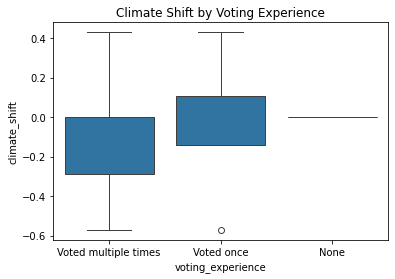

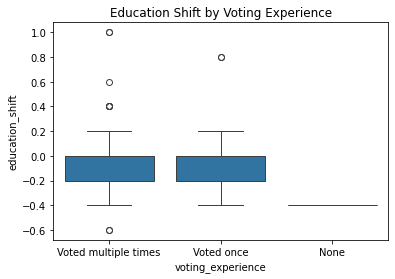

In [10]:
sns.boxplot(x='voting_experience', y='climate_shift', data=df)
plt.title('Climate Shift by Voting Experience')
plt.show()

sns.boxplot(x='voting_experience', y='education_shift', data=df)
plt.title('Education Shift by Voting Experience')
plt.show()

# Suspected first time voters

Since the studies aim was to investigate an influence of AI-generated content on Voters *in regards of the federal elections*, I decided to recalculate the ANOVA for the so called 'suspected first time voters' as well. Those voters are the participants who selected 'Voted once' could logically not have voted in federal elections due to their age but have only voted in non-federal elections previously. 

In [13]:
# Define extended group of first-time voters (confirmed + suspected)
df["extended_first_time"] = (
    ((df["voting_experience"] == "Voted once") | (df["voting_experience"] == "None")) &
    (df["age"] == "under 20")
)

# Create a new group column
df["voter_group"] = df["extended_first_time"].apply(lambda x: "First-time" if x else "Experienced")

In [14]:
# T-tests
climate_ttest = ttest_ind(df[df['voter_group'] == 'First-time']['climate_shift'],
                            df[df['voter_group'] == 'Experienced']['climate_shift'])
education_ttest = ttest_ind(df[df['voter_group'] == 'First-time']['education_shift'],
                              df[df['voter_group'] == 'Experienced']['education_shift'])

print("Climate Shift T-Test:", climate_ttest)
print("Education Shift T-Test:", education_ttest)

Climate Shift T-Test: Ttest_indResult(statistic=-0.8746872742536416, pvalue=0.3856178783005769)
Education Shift T-Test: Ttest_indResult(statistic=-0.22106754848589202, pvalue=0.8258736260487336)


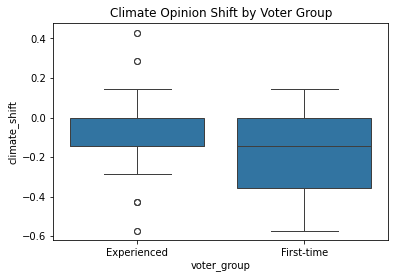

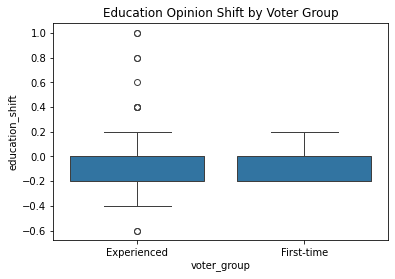

In [16]:
# Boxplots
sns.boxplot(x='voter_group', y='climate_shift', data=df)
plt.title('Climate Opinion Shift by Voter Group')
plt.show()

sns.boxplot(x='voter_group', y='education_shift', data=df)
plt.title('Education Opinion Shift by Voter Group')
plt.show()

### Conclusion

No statistically significant differences in opinion shift were found between predefined voting experience groups or between first-time and experienced voters (p > 0.05). Voting experience did not appear to influence short-term opinion change.